In [14]:
import numpy as np

In [15]:
import pandas as pd

In [16]:
df=pd.read_csv('spam.csv')

In [17]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [18]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [19]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [24]:
df.rename(columns={'v1':'Values','v2':'Message'},inplace=True)

In [25]:
df

,Values,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [26]:
df['Message'] = df['Message'].astype(str).fillna('')

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string

In [36]:
# Preprocess the text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    return ' '.join([word for word in text.split() if word not in stop_words])

df['Message'] = df['Message'].apply(preprocess_text)

In [37]:
# Separate ham and spam messages
ham_messages = df[df['Values'] == 'ham']['Message']
spam_messages = df[df['Values'] == 'spam']['Message']


In [39]:
# Get the most common unigrams
def get_most_common_ngrams(messages, n, top_k):
    ngrams_list = []
    for message in messages:
        ngrams_list.extend(get_ngrams(message, n))
    return Counter(ngrams_list).most_common(top_k)

def get_ngrams(text, n):
    words = text.split()
    return list(zip(*[words[i:] for i in range(n)]))

# Find the 10 most frequent unigrams for ham and spam
top_ham_unigrams = get_most_common_ngrams(ham_messages, 1, 10)
top_spam_unigrams = get_most_common_ngrams(spam_messages, 1, 10)

print("Top 10 most frequent unigrams in ham messages:", top_ham_unigrams)
print("Top 10 most frequent unigrams in spam messages:", top_spam_unigrams)

Top 10 most frequent unigrams in ham messages: [(('u',), 972), (('im',), 449), (('2',), 305), (('get',), 303), (('ltgt',), 276), (('ok',), 272), (('dont',), 257), (('go',), 247), (('ur',), 240), (('ill',), 236)]
Top 10 most frequent unigrams in spam messages: [(('call',), 347), (('free',), 216), (('2',), 173), (('txt',), 150), (('u',), 147), (('ur',), 144), (('mobile',), 123), (('text',), 120), (('4',), 119), (('claim',), 113)]


In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

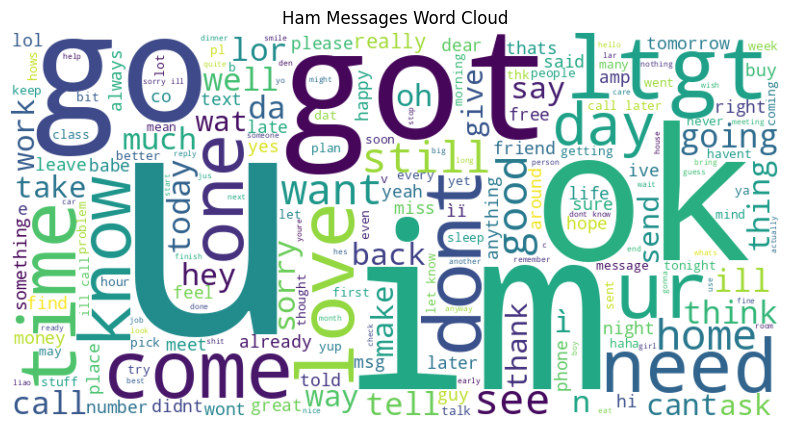

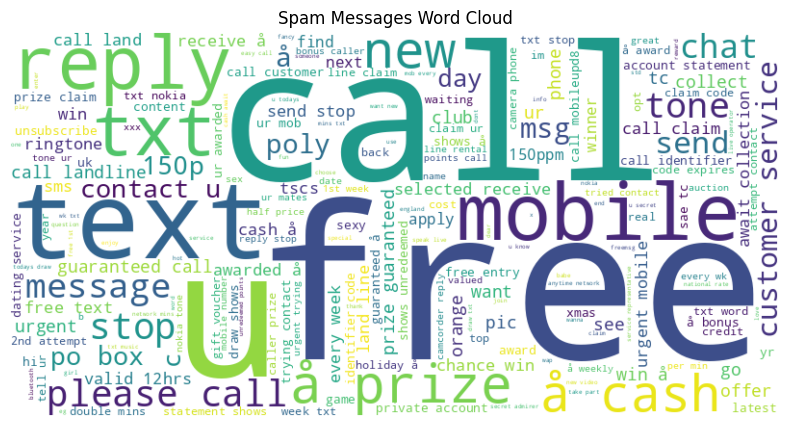

In [74]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()


ham_text = ' '.join(ham_messages)
generate_wordcloud(ham_text, 'Ham Messages Word Cloud')


spam_text = ' '.join(spam_messages)
generate_wordcloud(spam_text, 'Spam Messages Word Cloud')

In [46]:
from nltk.util import ngrams

In [47]:
# Function to get bigrams
def get_bigrams(text):
    words = text.split()
    return list(ngrams(words, 2))


def get_most_common_bigrams(messages, top_k):
    bigrams_list = []
    for message in messages:
        bigrams_list.extend(get_bigrams(message))
    return Counter(bigrams_list).most_common(top_k)

# Find the 10 most frequent bigrams for ham and spam
top_ham_bigrams = get_most_common_bigrams(ham_messages, 10)
top_spam_bigrams = get_most_common_bigrams(spam_messages, 10)

print("Top 10 most frequent bigrams in ham messages:", top_ham_bigrams)
print("Top 10 most frequent bigrams in spam messages:", top_spam_bigrams)

Top 10 most frequent bigrams in ham messages: [(('call', 'later'), 50), (('ill', 'call'), 48), (('let', 'know'), 39), (('sorry', 'ill'), 39), (('r', 'u'), 37), (('u', 'r'), 33), (('dont', 'know'), 32), (('wan', '2'), 31), (('good', 'morning'), 30), (('im', 'going'), 24)]
Top 10 most frequent bigrams in spam messages: [(('please', 'call'), 44), (('contact', 'u'), 24), (('po', 'box'), 24), (('å£1000', 'cash'), 23), (('guaranteed', 'call'), 23), (('prize', 'guaranteed'), 22), (('send', 'stop'), 19), (('every', 'week'), 19), (('await', 'collection'), 19), (('urgent', 'mobile'), 18)]


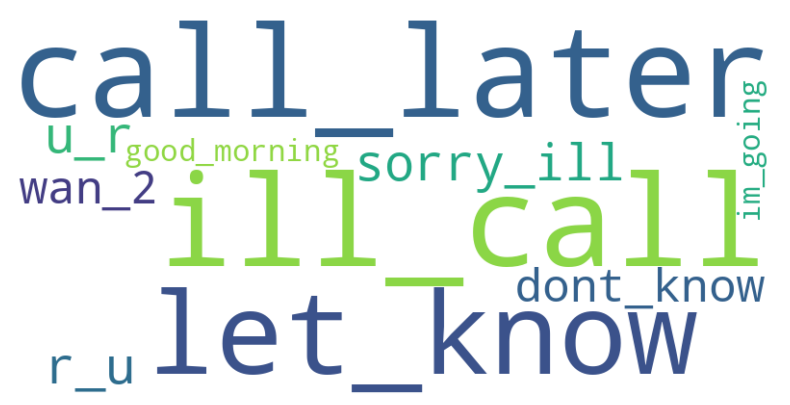

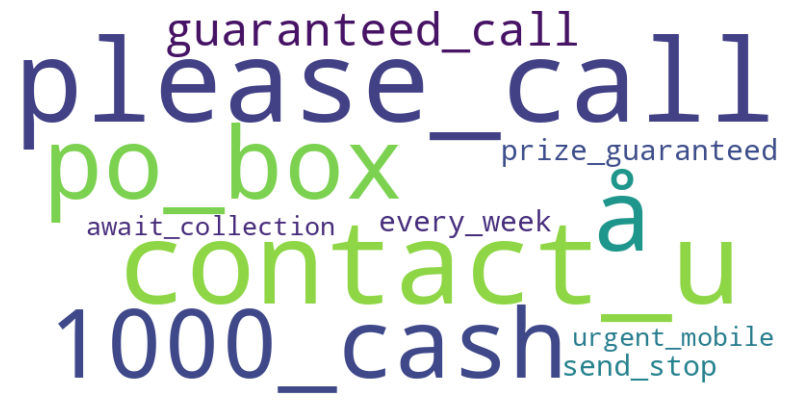

In [50]:
def join_bigrams(bigrams):
    return ['_'.join(bigram) for bigram in bigrams]

# Generate word cloud for bigrams
def generate_bigram_wordcloud(bigrams, title):
    bigram_text = ' '.join(join_bigrams(bigram for bigram, freq in bigrams))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bigram_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


generate_bigram_wordcloud(top_ham_bigrams, 'Ham Messages Bigrams Word Cloud')
generate_bigram_wordcloud(top_spam_bigrams, 'Spam Messages Bigrams Word Cloud')

In [48]:
def get_trigrams(text):
    words = text.split()
    return list(ngrams(words, 3))


def get_most_common_trigrams(messages, top_k):
    trigrams_list = []
    for message in messages:
        trigrams_list.extend(get_trigrams(message))
    return Counter(trigrams_list).most_common(top_k)

# Find the 10 most frequent trigrams for ham and spam
top_ham_trigrams = get_most_common_trigrams(ham_messages, 10)
top_spam_trigrams = get_most_common_trigrams(spam_messages, 10)

print("Top 10 most frequent trigrams in ham messages:", top_ham_trigrams)
print("Top 10 most frequent trigrams in spam messages:", top_spam_trigrams)

Top 10 most frequent trigrams in ham messages: [(('ill', 'call', 'later'), 42), (('sorry', 'ill', 'call'), 38), (('u', 'wan', '2'), 21), (('happy', 'new', 'year'), 18), (('pls', 'send', 'message'), 13), (('cant', 'pick', 'phone'), 12), (('pick', 'phone', 'right'), 12), (('phone', 'right', 'pls'), 12), (('right', 'pls', 'send'), 12), (('hi', 'hi', 'hi'), 11)]
Top 10 most frequent trigrams in spam messages: [(('prize', 'guaranteed', 'call'), 21), (('reply', 'call', '08000930705'), 14), (('land', 'line', 'claim'), 14), (('private', '2003', 'account'), 13), (('2003', 'account', 'statement'), 13), (('guaranteed', 'å£1000', 'cash'), 12), (('camcorder', 'reply', 'call'), 12), (('shows', '800', 'unredeemed'), 12), (('free', 'entry', '2'), 11), (('please', 'call', 'customer'), 11)]


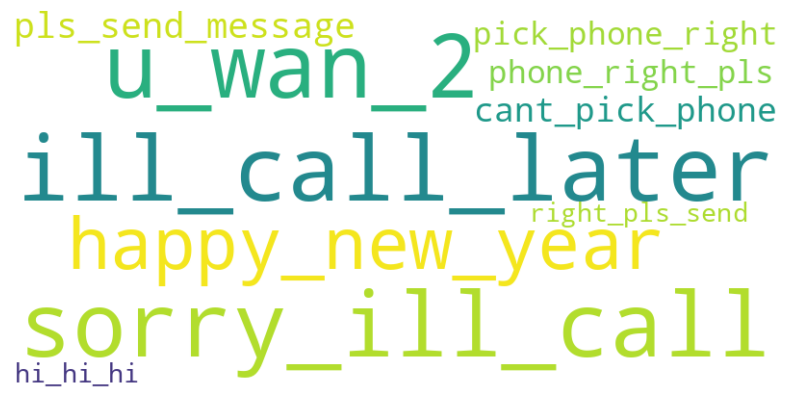

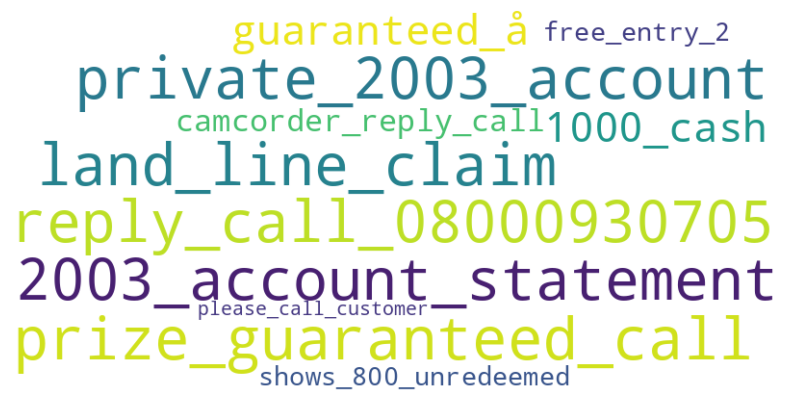

In [52]:
# Function to join trigrams with an underscore
def join_trigrams(trigrams):
    return ['_'.join(trigram) for trigram in trigrams]

# Generate word cloud for trigrams
def generate_trigram_wordcloud(trigrams, title):
    trigram_text = ' '.join(join_trigrams(trigram for trigram, freq in trigrams))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(trigram_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word clouds for ham and spam trigrams
generate_trigram_wordcloud(top_ham_trigrams, 'Ham Messages Trigrams Word Cloud')
generate_trigram_wordcloud(top_spam_trigrams, 'Spam Messages Trigrams Word Cloud')


In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
# Convert text to vectors using Bag-of-Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Message'])

# Convert to DataFrame for better readability (optional)
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Print the shape of the DataFrame
print("Shape of the Bag-of-Words DataFrame:", bow_df.shape)
print(bow_df.head())

Shape of the Bag-of-Words DataFrame: (5572, 9376)
   008704050406  0089my  0121  01223585236  01223585334  0125698789  02  \
0             0       0     0            0            0           0   0   
1             0       0     0            0            0           0   0   
2             0       0     0            0            0           0   0   
3             0       0     0            0            0           0   0   
4             0       0     0            0            0           0   0   

   020603  0207  02070836089  ...  ìï  ìïll  ûthanks  ûªm  ûªt  ûªve  ûï  \
0       0     0            0  ...   0     0        0    0    0     0   0   
1       0     0            0  ...   0     0        0    0    0     0   0   
2       0     0            0  ...   0     0        0    0    0     0   0   
3       0     0            0  ...   0     0        0    0    0     0   0   
4       0     0            0  ...   0     0        0    0    0     0   0   

   ûïharry  ûò  ûówell  
0        0   0   

In [75]:
from sklearn.feature_extraction.text import CountVectorizer


# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(df['Message'])

bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


print("Shape of the Bag-of-Words DataFrame:", bow_df.shape)
print(bow_df)  


Shape of the Bag-of-Words DataFrame: (5572, 8305)
      0089my  0776xxxxxxx  077xxx  0789xxxxxxx  0796xxxxxx  07xxxxxxxxx  \
0          0            0       0            0           0            0   
1          0            0       0            0           0            0   
2          0            0       0            0           0            0   
3          0            0       0            0           0            0   
4          0            0       0            0           0            0   
...      ...          ...     ...          ...         ...          ...   
5567       0            0       0            0           0            0   
5568       0            0       0            0           0            0   
5569       0            0       0            0           0            0   
5570       0            0       0            0           0            0   
5571       0            0       0            0           0            0   

      08452810075over18s  08700621170150p  087014

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder




In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Values'], test_size=0.2, random_state=42)

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [60]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [61]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"F1-score: {f1}")


F1-score: 0.9767026752564582


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['Message'])

# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, df['Values'], test_size=0.2, random_state=42)

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [64]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate the F1-score
f1_tfidf = f1_score(y_test, y_pred, average='weighted')

print(f"F1-score using TF-IDF: {f1_tfidf}")


F1-score using TF-IDF: 0.9368233667429708


In [68]:
import re
from nltk.stem import WordNetLemmatizer

In [69]:
# Define preprocessing function
def preprocess_text(text):
    # Remove email-ids and urls
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'http\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Convert to lower case
    tokens = [word.lower() for word in tokens]
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Remove numbers
    tokens = [word for word in tokens if not word.isdigit()]
    
    # Remove punctuation marks
    tokens = [word for word in tokens if word not in string.punctuation]
    
    # Lemmatize each token
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

df['Message'] = df['Message'].apply(preprocess_text)

In [70]:
# Convert text to vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Message'])

# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, df['Values'], test_size=0.2, random_state=42)

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set and calculate the F1-score
y_pred = model.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score using TF-IDF: {f1_tfidf}")

F1-score using TF-IDF: 0.942347350889695


In [73]:
# Bag-of-Words model
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['Message'])
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, df['Values'], test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_bow, y_train)
y_pred_bow = model.predict(X_test_bow)
f1_bow = f1_score(y_test, y_pred_bow, average='weighted')

# TF-IDF model without preprocessing
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Message'])
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, df['Values'], test_size=0.2, random_state=42)
model.fit(X_train_tfidf, y_train)
y_pred_tfidf = model.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf, average='weighted')

# TF-IDF model with preprocessing
tfidf_vectorizer_preprocessed = TfidfVectorizer()
X_tfidf_preprocessed = tfidf_vectorizer_preprocessed.fit_transform(df['Message'])
X_train_tfidf_preprocessed, X_test_tfidf_preprocessed, y_train, y_test = train_test_split(X_tfidf_preprocessed, df['Values'], test_size=0.2, random_state=42)
model.fit(X_train_tfidf_preprocessed, y_train)
y_pred_tfidf_preprocessed = model.predict(X_test_tfidf_preprocessed)
f1_tfidf_preprocessed = f1_score(y_test, y_pred_tfidf_preprocessed, average='weighted')

# Print the F1-scores of all models
def print_scores(bow_score, tfidf_score, tfidf_preprocessed_score):
    print(f"F1-score using Bag-of-Words: {bow_score}")
    print(f"F1-score using TF-IDF: {tfidf_score}")
    print(f"F1-score using TF-IDF with text preprocessing: {tfidf_preprocessed_score}")

print_scores(f1_bow, f1_tfidf, f1_tfidf_preprocessed)

F1-score using Bag-of-Words: 0.977671669693654
F1-score using TF-IDF: 0.942347350889695
F1-score using TF-IDF with text preprocessing: 0.942347350889695
